# **ETAPA DE PROCESAMIENTO DE DATOS**

# *Isabella Ceballos y Juan Jose Restrepo*



**1) Importar librerías y lectura de base de datos**

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

url="https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
data = pd.read_csv(url, header=None, na_values=" ?")
data.columns = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num', 'Maritalstatus', 'Occupation',
              'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hpw', 'Country', 'C']

**2) Conocimiento Previo Base**

Predecir si los ingresos que superan los 50.000 $/año basándose en los datos del censo. También conocido como conjunto de datos "Census Income".



*   age: Edad.
*   workclass: tipo de trabajo ( privado, etc.)
*   fnlwgt: Una estimación de la importancia de la persona en cuanto a su representatividad en relación entre la base de datos donde está.
*   education: Educaciones alcanzadas.
*   education-num: # de educaciones.
*   marital-status: Estado.
*   occupation: Ocupación laboral.
*   relationship: Relacion ( Casado, con hijos, etc.)
*   race: Raza.
*   sex: Sexo.
*   capital-gain: Ganancias.
*   capital-loss: Pérdidas.
*   hours-per-week: Horas de trabajo por semana.
*   native-country: País de procedencia

**3) Relación entre atributos**

<AxesSubplot:>

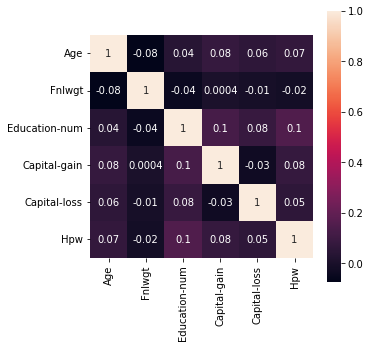

In [2]:
# Datos numéricos
fig, ax = plt.subplots(figsize=(5,5))

sns.heatmap(data.corr(), square=True, annot=True, ax=ax,fmt=".1g")

De aquí, se puede concluir que ningún atributo tiene relación con otro, por ende, no se puede borrar algún atributo

In [3]:
#Medidas de centralidad y desviación para atributos numéricos:
data.describe()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hpw
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
#Medidas de centralidad para atributos categóricos:
data.mode()

,Age,Workclass,Fnlwgt,Education,Education-num,Maritalstatus,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,36.0,Private,123011,HS-grad,9.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
1,NaN,NaN,164190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,203488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**4) Validar datos NaN o Nulls**

4.1 Cantidad de Null o NaN por atributos

In [5]:
data.isnull().sum()

Age                 0
Workclass        1836
Fnlwgt              0
Education           0
Education-num       0
Maritalstatus       0
Occupation       1843
Relationship        0
Race                0
Sex                 0
Capital-gain        0
Capital-loss        0
Hpw                 0
Country           583
C                   0
dtype: int64

In [6]:
(data.isnull().sum()/len(data))*100

Age              0.000000
Workclass        5.638647
Fnlwgt           0.000000
Education        0.000000
Education-num    0.000000
Maritalstatus    0.000000
Occupation       5.660146
Relationship     0.000000
Race             0.000000
Sex              0.000000
Capital-gain     0.000000
Capital-loss     0.000000
Hpw              0.000000
Country          1.790486
C                0.000000
dtype: float64

Como se logra ver, aunque hay datos faltantes estos representan entre el 2 y 6 % de los datos. Lo que podría implicar que al eliminarlos no afectaría tanto la base. Pero tendríamos que analizar que tanta influencia tienen los atributos en la etiqueta

4.2 Cantidad Null o NaN por registros

In [7]:
print('Cantidad máxima faltante por registros:',max(data.isnull().sum(axis=1)))

Cantidad máxima faltante por registros: 3


In [8]:
print(' Cantidad de registros con datos faltantes :',len(data[data.isnull().any(1)]))
print('Porcentaje',round((len(data[data.isnull().any(1)])/ len(data))*100,2),'%')

tres = data [(data.Workclass.isnull() & data.Occupation.isnull() & data.Country.isnull())] # 27
print(' Cantidad de registros con 3 datos faltantes :',len(tres))
print('Porcentaje',round(((len(tres)/ len(data))*100),2),'%')


faltantes1 = data [(data.Workclass.isnull() & data.Occupation.isnull() & data.Country.notnull()) ] # 1809
#faltantes2 = data [(data.Workclass.isnull() & data.Country.isnull() & data.Occupation.notnull())] DA CERO
#faltantes3 = data [(data.Occupation.isnull() & data.Country.isnull() &  data.Workclass.notnull())] DA CERO
dos = len(faltantes1)
print(' Cantidad de registros con 2 datos faltantes :',dos)
print('Porcentaje',round(((dos/ len(data))*100),2),'%')



#faltantes4 = data [(data.Workclass.isnull() & data.Occupation.notnull() & data.Country.notnull()) ] DA CERO
faltantes5 = data [(data.Workclass.notnull() & data.Country.isnull() & data.Occupation.notnull())] #556
faltantes6 = data [(data.Occupation.isnull() & data.Country.notnull() &  data.Workclass.notnull())] # 7
uno = len(faltantes5)+len(faltantes6)
print(' Cantidad de registros con 1 dato faltante :',uno)
print('Porcentaje',round((uno/ len(data))*100,2),'%')
print(len(data))

 Cantidad de registros con datos faltantes : 2399
Porcentaje 7.37 %
 Cantidad de registros con 3 datos faltantes : 27
Porcentaje 0.08 %
 Cantidad de registros con 2 datos faltantes : 1809
Porcentaje 5.56 %
 Cantidad de registros con 1 dato faltante : 563
Porcentaje 1.73 %
32561


Dado los resultados obtenidos, optamos por eliminar todos los datos NaN, debido a que el 7 % es muy mínimo y no afectará en el estudio

In [9]:
data = data.drop(index= data[data.isnull().any(1)].index)
data.shape

(30162, 15)

**6) Validar datos atípicos**

6.1 Datos Atípicos por atributos numéricos

In [10]:
# Encontramos el Q1, Q3, y el rango intercuartílico para cada columna
lista=[]
indices = []
numericas=['Age','Fnlwgt','Education-num','Capital-gain','Capital-loss','Hpw']

for i in numericas:
    Q3, Q1 = np. percentile (data[i], [75, 25])
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5*IQR
    lim_sup = Q3 + 1.5*IQR
    lista.append(len(data[(data[i]< lim_inf) | (data[i] >lim_sup)]))
    indices.append(data[(data[i]< lim_inf) | (data[i] >lim_sup)].index)

for i in range (6):
   print(" La cantidad de datos atípicos en ",data.columns[i],"son",lista[i]," con un porcentaje del",round((lista[i]/len(data))*100,2))

 La cantidad de datos atípicos en  Age son 169  con un porcentaje del 0.56
 La cantidad de datos atípicos en  Workclass son 903  con un porcentaje del 2.99
 La cantidad de datos atípicos en  Fnlwgt son 196  con un porcentaje del 0.65
 La cantidad de datos atípicos en  Education son 2538  con un porcentaje del 8.41
 La cantidad de datos atípicos en  Education-num son 1427  con un porcentaje del 4.73
 La cantidad de datos atípicos en  Maritalstatus son 7953  con un porcentaje del 26.37


6.2 Datos atípicos por registros

In [11]:
import itertools
lista = list(itertools.chain(*indices))
lista.sort()
cantidad =list(map(lambda x: lista.count(x),lista))
lista2=[]
lista3=[]

for i in range(len(cantidad)):
  if cantidad[i] == 2:
    lista2.append(lista[i])
  if cantidad[i]== 3:
    lista3.append(lista[i])

print("Hay ",len(pd.unique(lista2)),"registros que tienen 2 datos atípicos")
print("Porcentaje: ",round((len(pd.unique(lista2))/len(data))*100,2),"%")
print("Hay ",len(pd.unique(lista3)),"registros que tienen 3 datos atípicos")
print("Porcentaje: ",round((len(pd.unique(lista3))/len(data))*100,2),"%")
print("Si eliminamos de 2 y 3 datos atípicos representa un", round(((len(pd.unique(lista3))+ len(pd.unique(lista2)))/len(data))*100,2),"%")
lista2.extend(lista3)
lista2 = pd.unique(lista2)
print("Que serían:",len(lista2),"datos")



Hay  1366 registros que tienen 2 datos atípicos
Porcentaje:  4.53 %
Hay  57 registros que tienen 3 datos atípicos
Porcentaje:  0.19 %
Si eliminamos de 2 y 3 datos atípicos representa un 4.72 %
Que serían: 1423 datos


In [12]:
atipicos = data.drop(lista2, axis=0, inplace=False)
atipicos.shape

(28739, 15)

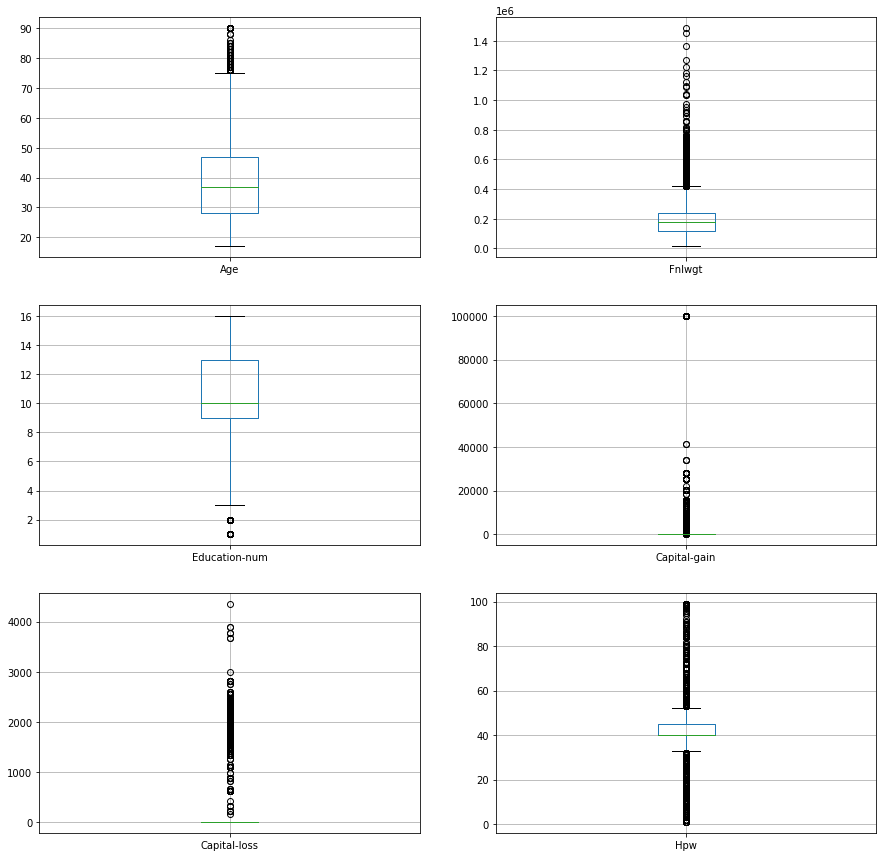

In [13]:
#Diagrama de cajas y bigotes para atributos numéricos
fig, axes = plt.subplots(3,2,figsize=(15,15))
numericas=['Age','Fnlwgt','Education-num','Capital-gain','Capital-loss','Hpw']
y = 0

for i in numericas:
    a = data.boxplot(i,ax=axes.flatten()[y])
    y += 1
plt.show()

**6) Normalización de Datos**

6.1 Normalización atributos numéricos

In [14]:
def numericas (base):
  numericas=['Age','Fnlwgt','Education-num','Capital-gain','Capital-loss','Hpw']

  from sklearn.preprocessing import StandardScaler
  standard_scaler = StandardScaler()
  for i in numericas:
    l_values = base[[i]]
    scaled_values = standard_scaler.fit(l_values)
    base[[i]] = standard_scaler.transform(l_values)

numericas(data)
numericas(atipicos)

6.2 Normalización atributos categóricos

In [15]:
data = pd.get_dummies(data)
atipicos = pd.get_dummies(atipicos) #oneHotEncoding en Pandas
print(data.shape)
print(atipicos.shape)

(30162, 106)
(28739, 106)


In [16]:
#Medidas de centralidad y desviación para atributos numéricos:
data.describe()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hpw,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia,C_ <=50K,C_ >50K
count,3.016200e+04,3.016200e+04,3.016200e+04,3.016200e+04,3.016200e+04,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,...,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,1.535952e-16,1.684365e-17,-3.053058e-16,-2.720897e-17,7.703318e-17,-2.833973e-16,0.031265,0.068530,0.738877,0.035608,...,0.000365,0.002354,0.001392,0.000564,0.000597,0.911876,0.002122,0.000530,0.751078,0.248922
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,0.174035,0.252657,0.439254,0.185313,...,0.019094,0.048461,0.037291,0.023734,0.024422,0.283480,0.046016,0.023026,0.432396,0.432396
min,-1.632189e+00,-1.666094e+00,-3.577051e+00,-1.474446e-01,-2.185860e-01,-3.333218e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.946967e-01,-6.830644e-01,-4.397382e-01,-1.474446e-01,-2.185860e-01,-7.773411e-02,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,-1.094756e-01,-1.076072e-01,-4.757405e-02,-1.474446e-01,-2.185860e-01,-7.773411e-02,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,6.518811e-01,4.527602e-01,1.128918e+00,-1.474446e-01,-2.185860e-01,3.396356e-01,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,3.925715e+00,1.225647e+01,2.305411e+00,1.335458e+01,1.055581e+01,4.847229e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**7) Validar el balanceo de la base**

In [17]:
print(data['C_ <=50K'].value_counts())

1    22654
0     7508
Name: C_ <=50K, dtype: int64


In [18]:
print(atipicos['C_ <=50K'].value_counts())

1    21896
0     6843
Name: C_ <=50K, dtype: int64


Aquí se ve que la base se encuentra **desbalanceada**

7.1 Base con sub-muestreo

In [19]:
df_true = data[data['C_ <=50K'] == 1]
df_false = data[data['C_ <=50K'] == 0]
data_muestreo = pd.concat([df_false, df_true.sample(df_false.shape[0])])
print(data_muestreo['C_ <=50K'].value_counts())

0    7508
1    7508
Name: C_ <=50K, dtype: int64


In [20]:
df_true = atipicos[atipicos['C_ <=50K'] == 1]
df_false = atipicos[atipicos['C_ <=50K'] == 0]
data_muestreo_atipicos = pd.concat([df_false, df_true.sample(df_false.shape[0])])
print(data_muestreo_atipicos['C_ <=50K'].value_counts())

0    6843
1    6843
Name: C_ <=50K, dtype: int64


# **ETAPA DE ESQUEMAS DE VALIDACIÓN / ENTRENAMIENTO / MÉTRICA DE EVALUACIÓN**

**1) K - Flod Validation / Regresión Logística / F1-score**

> Bloc con sangría



In [21]:
# Se dividen los datos en los conjuntos de entrenamiento y prueba según K-Fold Validation
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import confusion_matrix



'''
# Visualizacion de los datos de entrenamiento
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Regresion Logistica (Conjunto de Entrenamiento)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()
'''

def entrenamiento (base):
  x = base.drop(['C_ <=50K','C_ >50K'], axis=1)
  y = base['C_ <=50K']
  # definimos K-flod Validaton
  cv = KFold(n_splits=5, random_state=1, shuffle=True)

  # Aplicamos la etapa de entrenamiento de los modelos a usar
  neigh = KNN(n_neighbors=5)
  models = [LogisticRegression(),LDA(),neigh]

  # Definimos función de evaluar
  def evaluar (cv,model,x,y,score):
    scores = cross_val_score(model, x, y, scoring=score, cv=cv, n_jobs=-1)
    return (scores)

  # Se reporta el promedio de la métrica de evaluación
  score =['f1','accuracy','recall']

  for i in models:
    for p in score:
      result = evaluar(cv,i,x,y,p)
      print('El',p,'en',i,'es: %.3f (%.3f)' % (np.mean(result), np.std(result)))


1.1 Base sin balancear

In [22]:
entrenamiento(data)

El f1 en LogisticRegression() es: 0.902 (0.004)
El accuracy en LogisticRegression() es: 0.848 (0.005)
El recall en LogisticRegression() es: 0.928 (0.003)
El f1 en LinearDiscriminantAnalysis() es: 0.895 (0.005)
El accuracy en LinearDiscriminantAnalysis() es: 0.837 (0.007)
El recall en LinearDiscriminantAnalysis() es: 0.926 (0.005)
El f1 en KNeighborsClassifier() es: 0.888 (0.004)
El accuracy en KNeighborsClassifier() es: 0.829 (0.005)
El recall en KNeighborsClassifier() es: 0.902 (0.005)


1.2 Base con sub-muestreo

In [23]:
entrenamiento(data_muestreo)

El f1 en LogisticRegression() es: 0.818 (0.007)
El accuracy en LogisticRegression() es: 0.822 (0.008)
El recall en LogisticRegression() es: 0.800 (0.012)
El f1 en LinearDiscriminantAnalysis() es: 0.799 (0.005)
El accuracy en LinearDiscriminantAnalysis() es: 0.808 (0.006)
El recall en LinearDiscriminantAnalysis() es: 0.763 (0.012)
El f1 en KNeighborsClassifier() es: 0.792 (0.005)
El accuracy en KNeighborsClassifier() es: 0.798 (0.005)
El recall en KNeighborsClassifier() es: 0.771 (0.006)


1.3 Base quitando 1423 datos atípicos (Sin balancear)

In [24]:
entrenamiento(atipicos)

El f1 en LogisticRegression() es: 0.903 (0.003)
El accuracy en LogisticRegression() es: 0.848 (0.004)
El recall en LogisticRegression() es: 0.931 (0.004)
El f1 en LinearDiscriminantAnalysis() es: 0.897 (0.004)
El accuracy en LinearDiscriminantAnalysis() es: 0.838 (0.006)
El recall en LinearDiscriminantAnalysis() es: 0.926 (0.006)
El f1 en KNeighborsClassifier() es: 0.891 (0.004)
El accuracy en KNeighborsClassifier() es: 0.831 (0.005)
El recall en KNeighborsClassifier() es: 0.903 (0.003)


 1.4 Base quitando 1423 datos atípicos (sub_muestreo)

In [25]:
entrenamiento(data_muestreo_atipicos)

El f1 en LogisticRegression() es: 0.807 (0.010)
El accuracy en LogisticRegression() es: 0.812 (0.008)
El recall en LogisticRegression() es: 0.785 (0.014)
El f1 en LinearDiscriminantAnalysis() es: 0.789 (0.008)
El accuracy en LinearDiscriminantAnalysis() es: 0.801 (0.005)
El recall en LinearDiscriminantAnalysis() es: 0.748 (0.009)
El f1 en KNeighborsClassifier() es: 0.786 (0.007)
El accuracy en KNeighborsClassifier() es: 0.794 (0.005)
El recall en KNeighborsClassifier() es: 0.757 (0.008)
